In [1]:
import numpy as np
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath("D:/other_thesis/codes_latestversion/general/codes/"))
import functions_model #import python file containing the functions
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
#import pydot
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error, mean_absolute_percentage_error
import geopandas as gpd
import warnings
import shap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import random
import math
import time
import seaborn as sns
#from boruta import BorutaPy

import math
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, kendalltau
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import json

random.seed(1234) # Set random seed

c:\Users\mieke\anaconda3\envs\thesis_base\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# For updates
import importlib
importlib.reload(functions_model)

<module 'functions_model' from 'D:\\other_thesis\\codes_latestversion\\general\\codes\\functions_model.py'>

In [3]:
time_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_time.geojson')
time_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_time.geojson')

geo_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_geo.geojson')
geo_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_geo.geojson')

random_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_random.geojson')
random_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_random.geojson')

In [4]:
with open(r'D:\other_thesis\rf_model\files\variables_time.json', 'r') as fp:
    variables_time = json.load(fp)
with open(r'D:\other_thesis\rf_model\files\variables_geo.json', 'r') as fp:
    variables_geo = json.load(fp)
with open(r'D:\other_thesis\rf_model\files\variables_random.json', 'r') as fp:
    variables_random = json.load(fp)

In [21]:
mod_time = ['$\mu_{NDVI,6}$', '$q_{NDVI,8}^{max}$', '$q_{NDVI,9}^{max}$', '$q_{NDVI,9}^{0.9}$', '$q_{EVI,6}^{max}$', '$q_{EVI,6}^{min}$', '$q_{EVI,7}^{max}$', '$q_{EVI,7}^{0.5}$', '$q_{EVI,8}^{max}$', '$\mu_{EVI,8}$', '$q_{EVI,9}^{max}$', '$q_{EVI,10}^{max}$', '$q_{EVI,10}^{0.5}$', '$q_{FAPAR,9}^{min}$', '$q_{FAPAR,10}^{min}$', '$q_{LAI,7}^{max}$', '$q_{LAI,8}^{min}$', '$q_{LAI,9}^{max}$', '$q_{SIF,10}^{0.1}$', '$q_{SSM,5}^{max}$', '$q_{SSM,9}^{max}$', '$q_{SUSM,5}^{0.9}$', '$q_{SUSM,6}^{0.5}$', '$q_{SUSM,9}^{0.9}$', '$\mu_{LSTd,9}$', '$q_{LSTn,5}^{0.1}$', '$q_{LSTn,9}^{0.5}$', '$q_{LSTn,9}^{min}$', '$q_{LSTn,10}^{max}$', '$q_{LSTd,10}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{PCPN,9}^{min}$', '$q_{PCPN,10}^{min}$', '$V$', '$R$', '$ST_{Vp}$', '$ST_{Rd}$', '$ST_{Nd}$', '$ST_{Bv}$', '$ST_{Ne}$', '$ST_{Vc}$', '$ST_{Ap}$', '$ST_{Lc}$']

In [43]:
mod_time = ['V', '$\mu_{FAPAR,10}$', '$q_{SUSM,8}^{0.5}$', '$R$', '$ST_{Ne}$', '$q_{SIF,10}^{max}$', '$q_{PCPN,7}^{max}$', '$q_{LSTd,10}^{0.9}$', '$q_{FAPAR,8}^{0.1}$', '$q_{EVI,10}^{max}$', '$q_{NDVI,9}^{max}$', '$q_{LSTn,9}^{0.5}$', '$\mu_{LSTd,9}$', '$q_{PCPN,9}^{min}$', '$q_{FAPAR,9}^{min}$', '$q_{FAPAR,10}^{min}$', '$q_{LSTn,10}^{max}$', '$q_{SIF,10}^{0.1}$', '$q_{NDVI,9}^{0.9}$', '$q_{EVI,10}^{0.5}$', '$\mu_{EVI,8}$', '$\mu_{NDVI,6}$', '$ST_{Bv}$', '$q_{PCPN,10}^{min}$', '$ST_{Ap}$', '$q_{SUSM,6}^{0.5}$', '$q_{EVI,6}^{min}$', '$q_{LAI,9}^{max}$', '$q_{LSTn,10}^{min}$', '$q_{EVI,9}^{max}$', '$q_{LAI,8}^{min}$', '$ST_{Rd}$', '$ST_{Nd}$', '$ST_{Vc}$', '$ST_{Lc}$', '$ST_{Vp}$', '$q_{SSM,9}^{max}$', '$q_{SUSM,9}^{0.9}$', '$q_{NDVI,8}^{máx}$', '$q_{EVI,8}^{max}$', '$q_{EVI,7}^{0.5}$', '$q_{LAI,7}^{max}$', '$q_{EVI,6}^{max}$', '$q_{LSTn,9}^{min}$', '$q_{EVI,7}^{max}$', '$q_{SUSM,5}^{0.9}$', '$q_{SSM,5}^{max}$', '$q_{PCPN,5}^{max}$', '$q_{LSTn,5}^{0.1}$']

In [32]:
mod_geo = ['$q_{NDVI,8}^{max}$', '$q_{NDVI,9}^{max}$', '$q_{EVI,6}^{max}$', '$q_{EVI,6}^{0.5}$', '$q_{EVI,7}^{max}$', '$q_{EVI,7}^{0.1}$', '$q_{EVI,8}^{max}$', '$\mu_{EVI,8}$', '$q_{EVI,9}^{max}$', '$\mu_{EVI,9}$', '$q_{EVI,10}^{max}$', '$q_{EVI,10}^{0.5}$', '$q_{FAPAR,7}^{min}$', '$q_{FAPAR,8}^{0.1}$', '$q_{FAPAR,9}^{min}$', '$q_{FAPAR,10}^{min}$', '$q_{LAI,6}^{max}$', '$q_{LAI,8}^{min}$', '$q_{LAI,9}^{max}$', '$q_{SIF,10}^{max}$', '$q_{SIF,10}^{0.1}$', '$q_{SSM,5}^{0.1}$', '$q_{SSM,6}^{max}$', '$q_{SSM,7}^{max}$', '$q_{SSM,9}^{max}$', '$q_{SSM,10}^{min}$', '$q_{SUSM,5}^{0.9}$', '$\mu_{SUSM,6}$', '$q_{SUSM,8}^{0.5}$', '$q_{SUSM,9}^{0.9}$', '$q_{SUSM,10}^{max}$', '$q_{LSTd,9}^{0.9}$', '$q_{LSTn,5}^{min}$', '$q_{LSTn,9}^{0.5}$', '$\mu_{LSTn,10}$', '$q_{PCPN,5}^{max}$', '$q_{PCPN,9}^{min}$', '$q_{PCPN,10}^{min}$', '$V$', '$R$', '$ST_{I}$', '$ST_{Vp}$', '$ST_{Rd}$', '$ST_{Nd}$', '$ST_{Bv}$', '$ST_{Ne}$', '$ST_{Vc}$', '$ST_{Ap}$', '$ST_{Lc}$']

In [59]:
mod_geo = ['V', '$q_{LSTn,5}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{SSM,5}^{.1}$', '$q_{PCPN,9}^{min}$', '$q_{LSTn,9}^{0.5}$', '$q_{PCPN,10}^{min}$', '$q_{SSM,10}^{min}$', '$q_{SSM,7}^{max}$', '$q_{FAPAR,8}^{0.1}$', '$q_{SUSM,8}^{0.5}$', '$\mu_{EVI,8}$', '$q_{SIF,10}^{max}$', '$q_{SUSM,10}^{max}$', '$q_{LAI,6}^{max}$', '$q_{SSM,9}^{max}$', '$q_{SUSM,9}^{0.9}$', '$q_{LSTd,9}^{0.9}$', 'R', '$q_{SUSM,5}^{0.9}$', '$ST_{Ne}$', '$ST_{Lc}$', '$q_{SSM,6}^{max}$', '$\mu_{SUSM,6}$', '$q_{EVI,10}^{max}$', '$q_{EVI,8}^{max}$', '$\mu_{LSTn,10}$', '$q_{NDVI,8}^{max}$', '$q_{EVI,6}^{0.5}$', '$q_{EVI,10}^{0.5}$', '$q_{EVI,7}^{max}$', '$q_{LAI,9}^{max}$', '$q_{EVI,7}^{0.1}$', '$q_{LAI,8}^{min}$', '$q_{FAPAR,7}^{min}$', '$q_{FAPAR,9}^{min}$', '$q_{SIF,10}^{0.1}$', '$q_{EVI,9}^{max}$', '$q_{NDVI,9}^{max}$', '$ST_{Ap}$', '$q_{EVI,6}^{max}$', '$ST_{Bv}$', '$ST_{Nd}$', '$ST_{Vc}$', '$ST_{Vp}$', '$ST_{I}$','$ST_{Rd}$', '$\mu_{EVI,9}$', '$q_{FAPAR,10}^{min}$']

In [64]:
mod_random = ['V', '$q_{LSTn,5}^{min}$', '$q_{SSM,5}^{min}$', '$q_{PCPN,9}^{min}$', '$q_{PCPN,10}^{min}$', '$q_{FAPAR,8}^{0.1}$', '$q_{SSM,10}^{min}$', '$\mu_{LSTn,9}$', '$\mu_{SUSM,8}$', '$q_{SSM,7}^{0.9}$', '$q_{LAI,6}^{max}$', '$q_{SIF,10}^{max}$', '$q_{LSTd,9}^{0.9}$', '$q_{SUSM,5}^{0.9}$', '$\mu_{EVI,8}$', '$\mu_{LSTn,10}$', '$R$', '$q_{SUSM,9}^{0.9}$', '$ST_{Ne}$', '$q_{SUSM,10}^{max}$', '$q_{EVI,10}^{max}$', '$q_{SSM,9}^{max}$', '$\mu_{SUSM,6}$', '$q_{EVI,8}^{max}$', '$ST_{Lc}$', '$q_{EVI,6}^{0.5}$', '$q_{EVI,10}^{0.5}$', '$q_{NDVI,9}^{max}$', '$q_{LSTn,10}^{0.9}$', '$q_{FAPAR,9}^{min}$', '$q_{EVI,7}^{max}$', '$q_{NDVI,8}^{max}$', '$q_{LAI,8}^{min}$', '$q_{EVI,9}^{max}$', '$q_{FAPAR,7}^{min}$', '$q_{EVI,7}^{0.1}$', '$q_{SIF,10}^{0.1}$', '$q_{NDVI,9}^{0.9}$', '$q_{EVI,6}^{max}$', '$ST_{Ap}$', '$q_{FAPAR,10}^{min}$', '$ST_{Bv}$', '$ST_{Vc}$', '$ST_{Vp}$', '$ST_{Nd}$','$ST_{Rd}$']

In [52]:
mod_random = ['$q_{NDVI,8}^{max}$', '$q_{NDVI,9}^{max}$', '$q_{NDVI,9}^{0.9}$', '$q_{EVI,6}^{max}$', '$q_{EVI,6}^{0.5}$', '$q_{EVI,7}^{max}$', '$q_{EVI,7}^{0.1}$', '$q_{EVI,6}^{max}$', '$ST_{Bv}$', '$ST_{Nd}$', '$ST_{Vc}$', '$ST_{Vc}$', '$ST_{Vp}$', '$ST_{I}$', '$ST_{Rd}$', '$\mu_{EVI,8}$', '$q_{EVI,9}^{max}$', '$q_{EVI,10}^{max}$', '$q_{EVI,10}^{0.5}$', '$q_{FAPAR,7}^{min}$', '$q_{FAPAR,8}^{0.1}$', '$q_{FAPAR,9}^{min}$', '$q_{FAPAR,10}^{min}$', '$q_{LAI,6}^{max}$', '$q_{LAI,8}^{min}$', '$q_{SIF,10}^{max}$', '$q_{SIF,10}^{0.1}$', '$q_{SSM,5}^{0.1}$', '$q_{SSM,7}^{0.9}$', '$q_{SSM,9}^{max}$', '$q_{SSM,10}^{min}$', '$q_{SUSM,5}^{0.9}$', '$\mu_{SUSM,6}$', '$\mu_{SUSM,8}$', '$q_{SUSM,9}^{0.9}$', '$q_{SUSM,10}^{max}$', '$q_{LSTd,9}^{0.9}$', '$q_{LSTd,10}^{0.9}$', '$q_{LSTn,5}^{min}$', '$\mu_{LSTn,9}$', '$\mu_{LSTn,10}$', '$q_{PCPN,9}^{min}$', '$q_{PCPN,10}^{min}$', '$V$', '$R$', '$ST_{Vp}$', '$ST_{Rd}$', '$ST_{Nd}$', '$ST_{Bv}$', '$ST_{Ne}$', '$ST_{Vc}$', '$ST_{Ap}$', '$ST_{Lc}$', '$\mu_{EVI,9}$', 'q_{FAPAR,10}^{min}']

In [16]:
np.argmax(geo_test['abs_diff'])
geo_test.loc[102,['Average Yield(Kg/Ha)','abs_diff']]
np.size(geo_test[(geo_test['Average Yield(Kg/Ha)'] > 2000) & (geo_test['Average Yield(Kg/Ha)'] < 8000)]['abs_diff'],0)#.mean()
#np.size(geo_test[(geo_test['Average Yield(Kg/Ha)'] < 2000) | (geo_test['Average Yield(Kg/Ha)'] > 8000)]['abs_diff'],0)#.mean()
check_df = geo_test.sort_values(['abs_diff'], ascending = False)[['Average Yield(Kg/Ha)', 'Y_pred', 'abs_diff']]
geo_test[(geo_test['Average Yield(Kg/Ha)'] < 2000)]['abs_diff'].mean() # 1454
geo_test[(geo_test['Average Yield(Kg/Ha)'] > 8000)]['abs_diff'].mean() # 3137

3137.731298461582

In [132]:
#np.size(geo_test[geo_test['Year'] == '2017-01-01T00:00:00'],0)
print(446+366+377)
print(447+361+403)


1189
1211


## TIME-DEPENDENT MODEL

In [45]:
updated_paramset_time = {'bootstrap': True, 'max_depth': 7, 'max_features': 17, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 300}
opt_features_time = variables_time
n_estimators_ = updated_paramset_time['n_estimators']
max_depth_ = updated_paramset_time['max_depth']
bootstrap_ = updated_paramset_time['bootstrap']
min_samples_leaf_ = updated_paramset_time['min_samples_leaf']
min_samples_split_ = updated_paramset_time['min_samples_split']

X_train = time_train[opt_features_time]
X_test = time_test[opt_features_time]
Y_train = time_train['Average Yield(Kg/Ha)']
Y_test = time_test['Average Yield(Kg/Ha)']

max_features_optimal = math.ceil(len(opt_features_time)/3)
if max_features_optimal == 0:
    max_features_optimal = 1

# Set parameters equal to the optimal parameters found
clf_time = RandomForestRegressor(n_estimators = n_estimators_, max_depth = max_depth_, bootstrap = bootstrap_, max_features = max_features_optimal, min_samples_leaf = min_samples_leaf_, min_samples_split = min_samples_split_, random_state = 1234)

#Fit to the training data
clf_time.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, max_features=17, min_samples_leaf=6,
                      min_samples_split=3, n_estimators=300, random_state=1234)

In [48]:
def permutation_importances(rf_model, features_com, predictor, test_dataset, path, length, varnames):
    import matplotlib
    X_val = test_dataset[features_com]
    y_val = test_dataset[predictor]

    importances_info = permutation_importance(rf_model, X_val, y_val, n_repeats=30, random_state=0)

    importances = importances_info['importances_mean']
    importances_std = importances_info['importances_std']
    feature_importances = [(feature, round(importance, 15), importances_std) for feature, importance, importances_std in zip(features_com, importances, importances_std)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    names=[]
    values=[]
    values_std = []

    for i in range(0, len(importances)):
        names.append(feature_importances[i][0])
        values.append(feature_importances[i][1])
        values_std.append(feature_importances[i][2])
    
    plt.rcParams["figure.figsize"] = (40,15)#(10,5)
    matplotlib.rcParams.update({'font.size': 20})
    plt.bar(varnames, values[:length], yerr = values_std[:length])
    #plt.tick_params(labelsize=16)
    #plt.xticks(names[:length], rotation='vertical')#, fontsize = 16)
    plt.xticks(varnames, rotation=45)#, fontsize = 16)
    plt.ylabel('Decrease in $R^2$ if feature is permuted', fontsize = 20); 
    plt.xlabel('Feature')#, fontsize = 16); 
    plt.title('Feature Importances')#, fontsize = 18)
    plt.savefig(path, bbox_inches='tight')
    plt.show()

    #print('Feature Importances: ' + str(feature_importances))

    return(feature_importances)

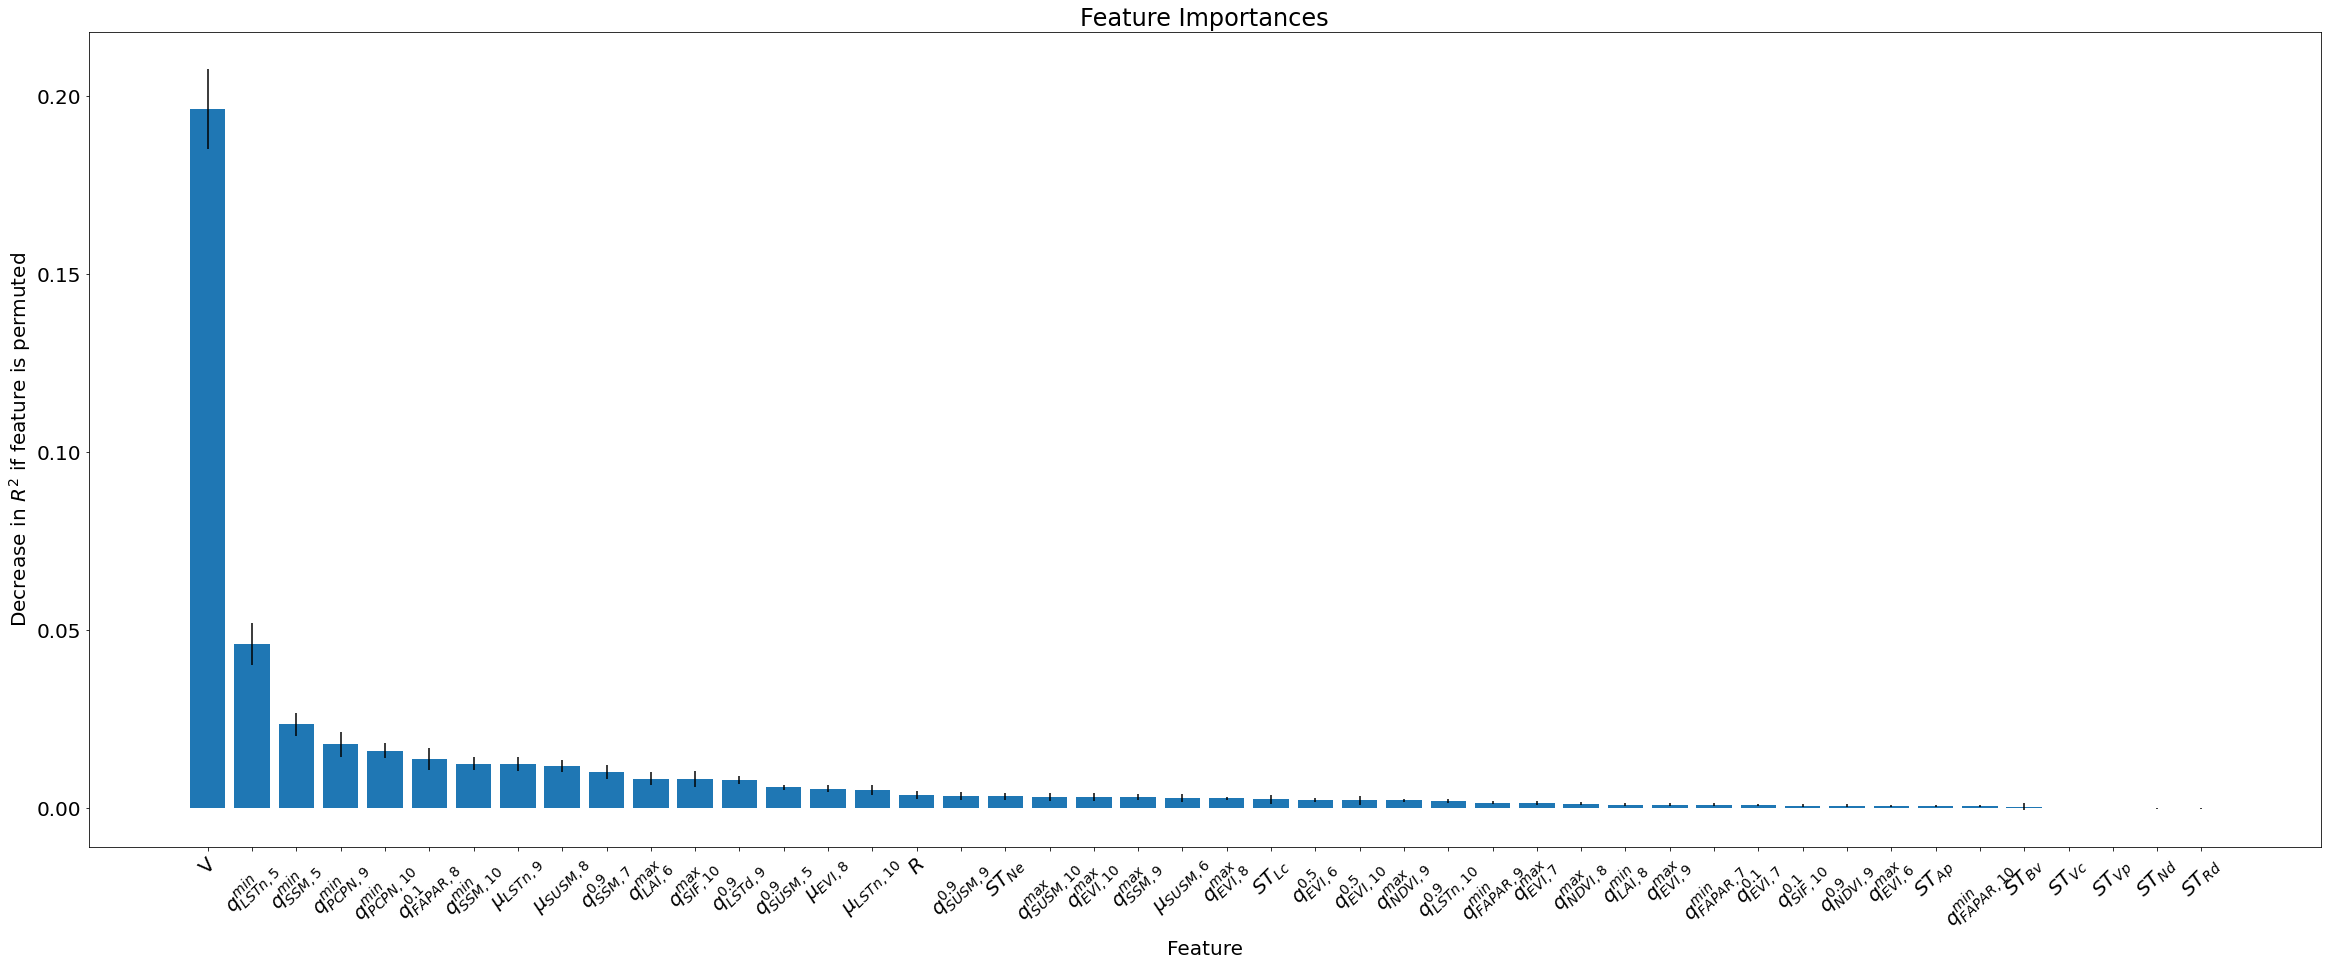

[('Previous District Yield(Kg/Ha)', 0.196300826284059, 0.01122853610036223),
 ('LST_night_05_min', 0.046247245210313, 0.005882562683749115),
 ('SSM_05_min', 0.023575174689995, 0.003140429394600042),
 ('Precipitation_09_min', 0.01801703669849, 0.0034595270292936847),
 ('Precipitation_10_min', 0.01625563948414, 0.0021819632099448322),
 ('FAPAR_08_percentile_10', 0.013958146892434, 0.0030679564221704997),
 ('SSM_10_min', 0.012568034827386, 0.0018718880504640296),
 ('LST_night_09_mean', 0.012444126110168, 0.0020095518778477602),
 ('SUSM_08_mean', 0.011854474373613, 0.0016799370465866502),
 ('SSM_07_percentile_90', 0.010245930760833, 0.001947520604380871),
 ('LAI_06_max', 0.008367281021744, 0.0017353996818177632),
 ('SIF_10_max', 0.008304587254204, 0.002264947411809656),
 ('LST_day_09_percentile_90', 0.007987540585276, 0.0012060783195774743),
 ('SUSM_05_percentile_90', 0.005925209352757, 0.0007720610783892034),
 ('EVI_08_mean', 0.005576802099911, 0.0009967632905201894),
 ('LST_night_10_mean

In [65]:
permutation_importances(clf_random, variables_random, 'Average Yield(Kg/Ha)', random_test, 'D:/other_thesis/rf_model/files/importances/perm_mod_random.png', len(variables_random), mod_random)
#['DY', 'mean_FAPAR_10', 'median_SUSM_8', 'IRR', 'Soil_Ne']

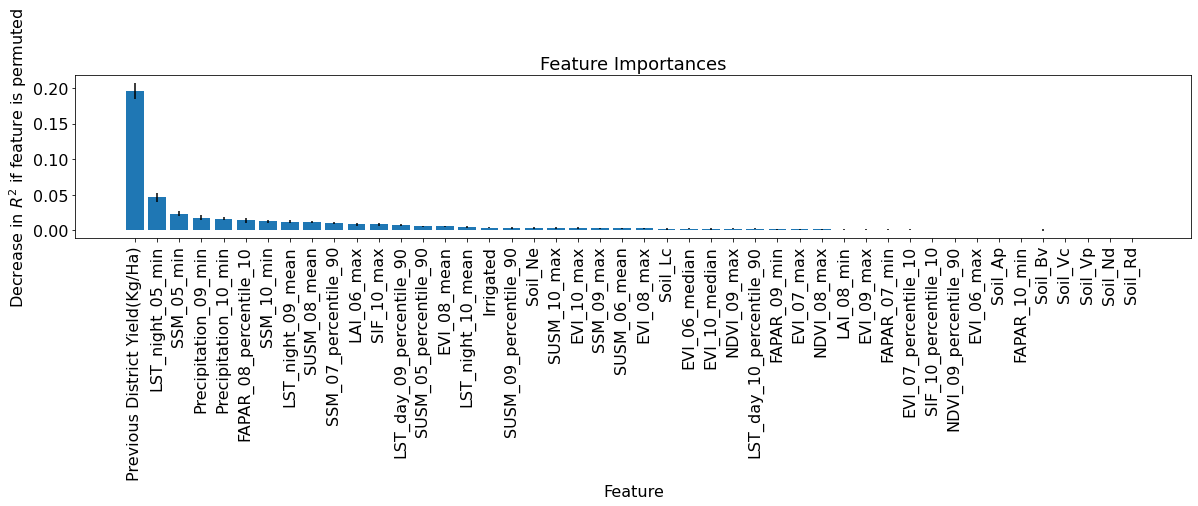

[('Previous District Yield(Kg/Ha)', 0.196300826284059, 0.01122853610036223),
 ('LST_night_05_min', 0.046247245210313, 0.005882562683749115),
 ('SSM_05_min', 0.023575174689995, 0.003140429394600042),
 ('Precipitation_09_min', 0.01801703669849, 0.0034595270292936847),
 ('Precipitation_10_min', 0.01625563948414, 0.0021819632099448322),
 ('FAPAR_08_percentile_10', 0.013958146892434, 0.0030679564221704997),
 ('SSM_10_min', 0.012568034827386, 0.0018718880504640296),
 ('LST_night_09_mean', 0.012444126110168, 0.0020095518778477602),
 ('SUSM_08_mean', 0.011854474373613, 0.0016799370465866502),
 ('SSM_07_percentile_90', 0.010245930760833, 0.001947520604380871),
 ('LAI_06_max', 0.008367281021744, 0.0017353996818177632),
 ('SIF_10_max', 0.008304587254204, 0.002264947411809656),
 ('LST_day_09_percentile_90', 0.007987540585276, 0.0012060783195774743),
 ('SUSM_05_percentile_90', 0.005925209352757, 0.0007720610783892034),
 ('EVI_08_mean', 0.005576802099911, 0.0009967632905201894),
 ('LST_night_10_mean

In [60]:
functions_model.permutation_importances(clf_random, variables_random, 'Average Yield(Kg/Ha)', random_test, 'D:/other_thesis/rf_model/files/importances/perm_random_55.png', len(variables_random))
#['DY', 'mean_FAPAR_10', 'median_SUSM_8', 'IRR', 'Soil_Ne']

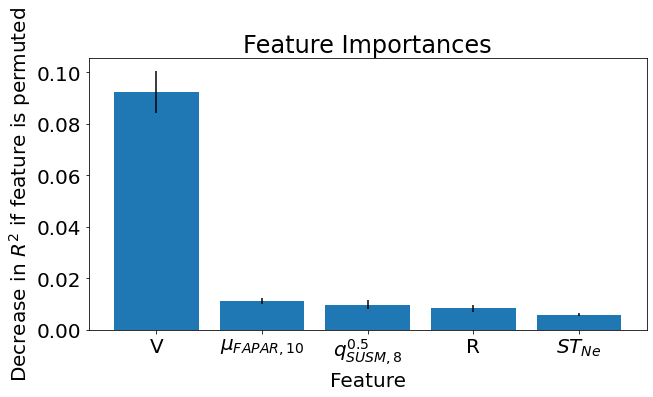

[('Previous District Yield(Kg/Ha)', 0.092345504966934, 0.008226822421403482),
 ('FAPAR_10_mean', 0.011217471094868, 0.0013059672624060365),
 ('SUSM_08_median', 0.009810073119401, 0.0016775243427145448),
 ('Irrigated', 0.00834788583254, 0.0013843937100466396),
 ('Soil_Ne', 0.005889470202731, 0.0006634516604281612),
 ('SIF_10_max', 0.005432038756546, 0.0011512231377088754),
 ('Precipitation_07_max', 0.004472798304122, 0.0014108168561568868),
 ('LST_day_10_percentile_90', 0.004438446479503, 0.0006121671775227532),
 ('FAPAR_08_percentile_10', 0.003960116126343, 0.0017131541966719367),
 ('EVI_10_max', 0.003262232721639, 0.0006701176790757796),
 ('NDVI_09_max', 0.002636179131611, 0.0005024404658510556),
 ('LST_night_09_median', 0.002576939743527, 0.001578494382187914),
 ('LST_day_09_mean', 0.002523592790982, 0.0005417291571758854),
 ('Precipitation_09_min', 0.002504590621918, 0.0007595963148907136),
 ('FAPAR_09_min', 0.00243787454114, 0.00043269217094972674),
 ('FAPAR_10_min', 0.002095635173

In [109]:
permutation_importances(clf_time, variables_time, 'Average Yield(Kg/Ha)', time_test, 'D:/other_thesis/rf_model/files/importances/perm_time_55.png', 5, ['V', '$\mu_{FAPAR,10}$', '$q_{SUSM,8}^{0.5}$', 'R', '$ST_{Ne}$'])
#['DY', 'mean_FAPAR_10', 'median_SUSM_8', 'IRR', 'Soil_Ne']

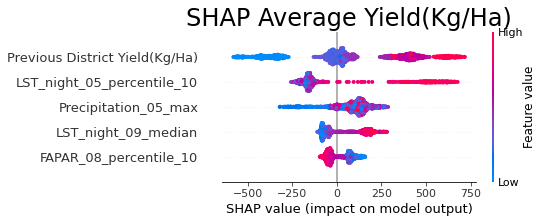

()

In [27]:
functions_model.SHAP_explainer(clf_time, time_test, variables_time, 'Average Yield(Kg/Ha)', len(variab))

In [99]:
numbers = list(np.arange(0,len(variables_time),1))
numbers = [str(i) for i in numbers]
numbers[39] = 'V'
numbers[30] = '$q_{LSTn,5}^{0.1}$'
numbers[35] = '$q_{PCPN,5}^{max}$'
numbers[31] = '$q_{LSTn,9}^{0.5}$'
numbers [13] = '$q_{FAPAR,8}^{0.1}$'

In [133]:
variables_time[39]

'Previous District Yield(Kg/Ha)'

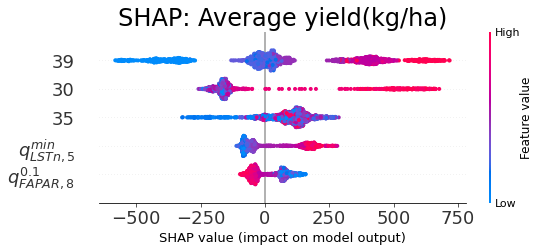

In [113]:
# #shap.dependence_plot(0, shap_values, X, show=False)
# plt.title("Age dependence plot")
# plt.ylabel("SHAP value for the 'Age' feature")
# # plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
# plt.show()

# plt.rcParams["figure.figsize"] = (10,10)
# matplotlib.rcParams.update({'font.size': 20})    
rf_model = shap.TreeExplainer(clf_time)
shap_values_rf_train = rf_model.shap_values(time_test[variables_time])

#shap.summary_plot(shap_values_rf_train, time_test[variables_time], max_display = 5)
shap.summary_plot(shap_values_rf_train, time_test[variables_time], feature_names=numbers, max_display = 5, show=False)
plt.rcParams["figure.figsize"] = (10,7)
matplotlib.rcParams.update({'font.size': 20})
#plt.legend(fontsize=18)   
plt.tick_params(labelsize=18)
#plt.ylabel(labelsize=40)
plt.title('SHAP: ' + 'Average yield(kg/ha)')
plt.show()

In [101]:
numbers = list(np.arange(0,len(variables_geo),1))
numbers = [str(i) for i in numbers]
numbers[38] = 'V'
numbers[32] = '$q_{LSTn,5}^{min}$'
numbers[33] = '$q_{LSTn,9}^{0.5}$'
numbers[21] = '$q_{SSM,5}^{0.1}$'
numbers [35] = '$q_{PCPN,5}^{max}$'

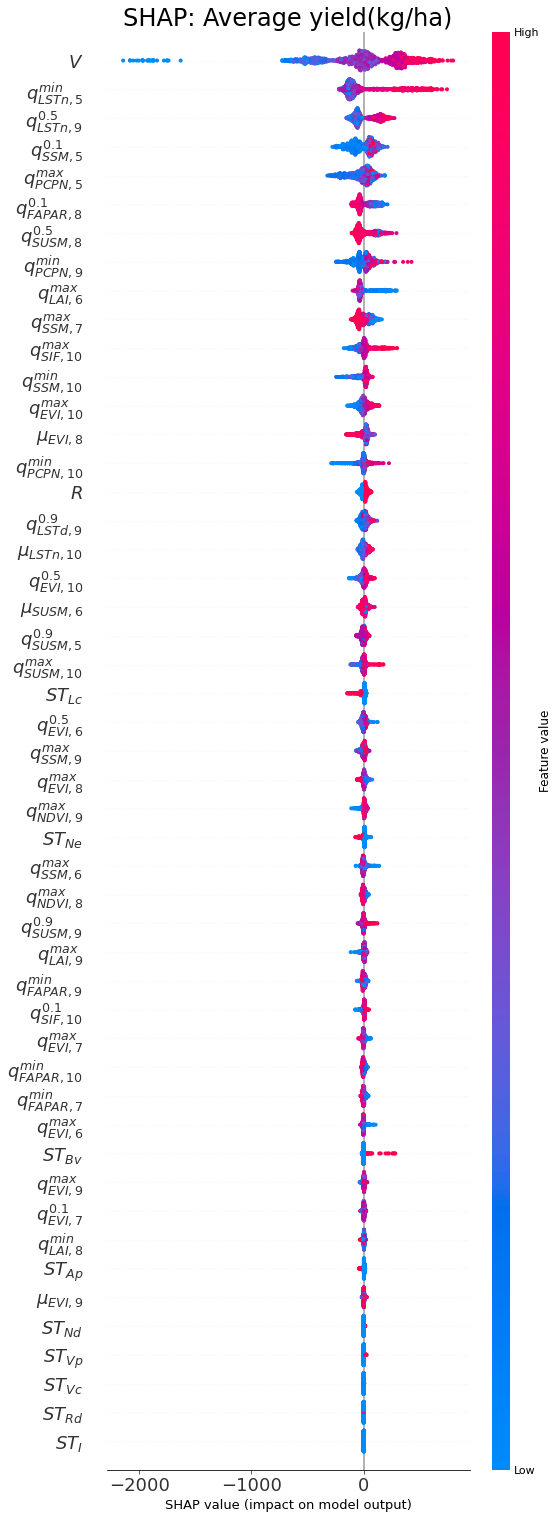

In [38]:
import matplotlib
# plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update({'font.size': 20})    
rf_model = shap.TreeExplainer(clf_geo)
shap_values_rf_train = rf_model.shap_values(geo_test[variables_geo])

#shap.summary_plot(shap_values_rf_train, time_test[variables_time], max_display = 5)
shap.summary_plot(shap_values_rf_train, geo_test[variables_geo], feature_names=mod_geo, max_display = len(variables_geo), show=False)
plt.rcParams["figure.figsize"] = (10,7)
matplotlib.rcParams.update({'font.size': 20})
#plt.legend(fontsize=18)   
plt.tick_params(labelsize=18)
#plt.ylabel(labelsize=40)
plt.title('SHAP: ' + 'Average yield(kg/ha)')
plt.show()

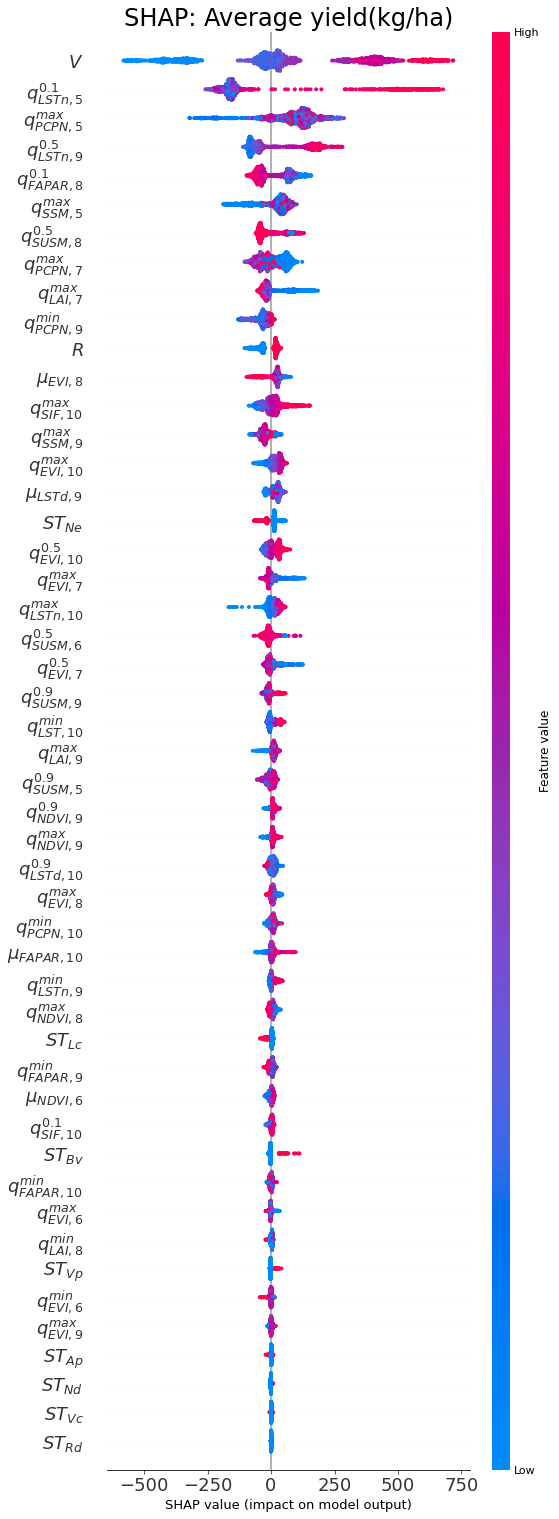

In [40]:
# import matplotlib
# plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update({'font.size': 20})    
rf_model = shap.TreeExplainer(clf_time)
shap_values_rf_train = rf_model.shap_values(time_test[variables_time])

#shap.summary_plot(shap_values_rf_train, time_test[variables_time], max_display = 5)
shap.summary_plot(shap_values_rf_train, time_test[variables_time], feature_names=mod_time, max_display = len(variables_time), show=False)
plt.rcParams["figure.figsize"] = (10,7)
matplotlib.rcParams.update({'font.size': 20})
#plt.legend(fontsize=18)   
plt.tick_params(labelsize=18)
#plt.ylabel(labelsize=40)
plt.title('SHAP: ' + 'Average yield(kg/ha)')
plt.show()

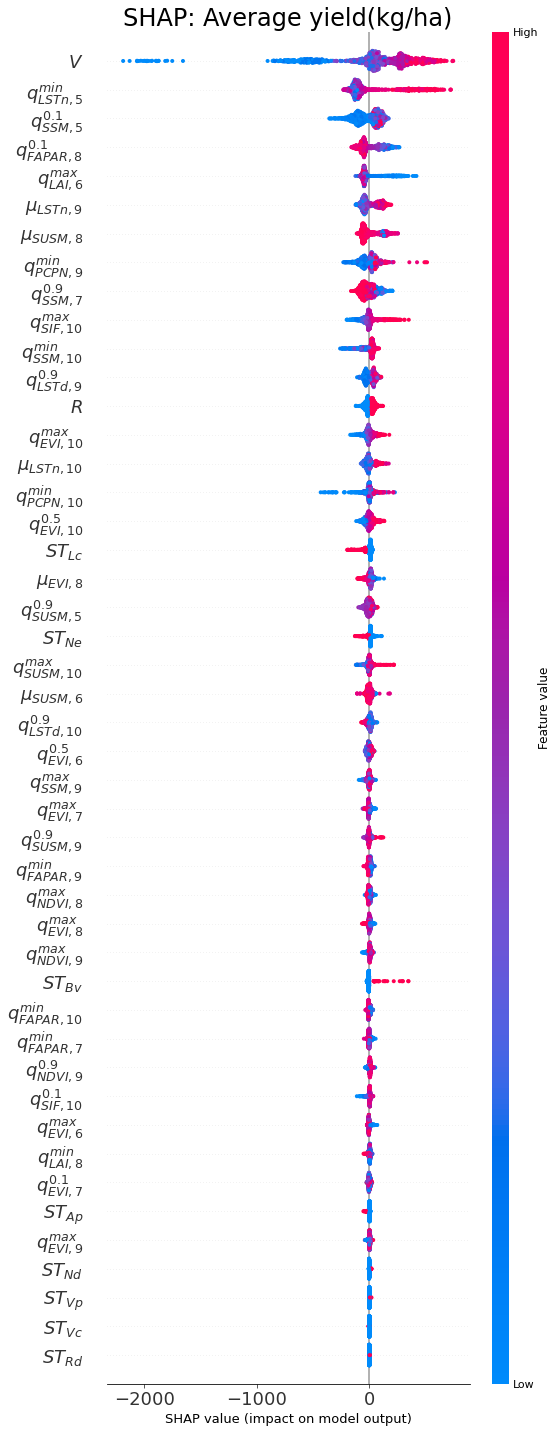

In [41]:
# import matplotlib
# plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update({'font.size': 20})    
rf_model = shap.TreeExplainer(clf_random)
shap_values_rf_train = rf_model.shap_values(random_test[variables_random])

#shap.summary_plot(shap_values_rf_train, time_test[variables_time], max_display = 5)
shap.summary_plot(shap_values_rf_train, random_test[variables_random], feature_names=mod_random, max_display = len(variables_random), show=False)
plt.rcParams["figure.figsize"] = (10,7)
matplotlib.rcParams.update({'font.size': 20})
#plt.legend(fontsize=18)   
plt.tick_params(labelsize=18)
#plt.ylabel(labelsize=40)
plt.title('SHAP: ' + 'Average yield(kg/ha)')
plt.show()

In [103]:
numbers = list(np.arange(0,len(variables_random),1))
numbers = [str(i) for i in numbers]
numbers[36] = 'V'
numbers[31] = '$q_{LSTn,5}^{min}$'
numbers[20] = '$q_{SSM,5}^{min}$'
numbers[13] = '$q_{FAPAR,8}^{0.1}$'
numbers [16] = '$q_{LAI,6}^{max}$'

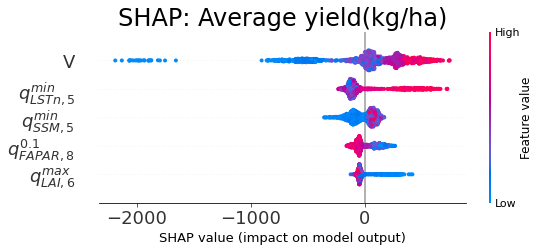

In [104]:
# import matplotlib
# plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update({'font.size': 20})    
rf_model = shap.TreeExplainer(clf_random)
shap_values_rf_train = rf_model.shap_values(random_test[variables_random])

#shap.summary_plot(shap_values_rf_train, time_test[variables_time], max_display = 5)
shap.summary_plot(shap_values_rf_train, random_test[variables_random], feature_names=numbers, max_display = 5, show=False)
plt.rcParams["figure.figsize"] = (10,7)
matplotlib.rcParams.update({'font.size': 20})
#plt.legend(fontsize=18)   
plt.tick_params(labelsize=18)
#plt.ylabel(labelsize=40)
plt.title('SHAP: ' + 'Average yield(kg/ha)')
plt.show()

In [ ]:
def SHAP_explainer(rf_model, train_dataset, features_com, predictor, length):
    rf_model = shap.TreeExplainer(rf_model)
    shap_values_rf_train = rf_model.shap_values(train_dataset[features_com])

    plt.title('SHAP ' + predictor)
    shap.summary_plot(shap_values_rf_train, train_dataset[features_com], max_display = length)
    return()

In [ ]:
# shp_plt = shap.dependence_plot('LST_night_05_min', shap_values_rf_train, test_geo[variables]) # CORRECT
shp_plt = shap.dependence_plot("SSM_05_max", shap_values, time_test[variables_time], interaction_index=None)

for i in range(len(variables_time)):
   shp_plt = shap.dependence_plot("SSM_05_max", shap_values, time_test[variables_time], interaction_index='rank(' + str(i) + ')')

#shap.dependence_plot(1, shap_values, train.values, feature_names=train.columns)

## GEOGARPHIC MODEL

In [29]:
updated_paramset_geo = {'bootstrap': True, 'max_depth': 9, 'max_features': 17, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 750}
opt_features_geo = variables_geo
n_estimators_ = updated_paramset_geo['n_estimators']
max_depth_ = updated_paramset_geo['max_depth']
bootstrap_ = updated_paramset_geo['bootstrap']
min_samples_leaf_ = updated_paramset_geo['min_samples_leaf']
min_samples_split_ = updated_paramset_geo['min_samples_split']

X_train = geo_train[opt_features_geo]
X_test = geo_test[opt_features_geo]
Y_train = geo_train['Average Yield(Kg/Ha)']
Y_test = geo_test['Average Yield(Kg/Ha)']

max_features_optimal = math.ceil(len(opt_features_geo)/3)
if max_features_optimal == 0:
    max_features_optimal = 1

# Set parameters equal to the optimal parameters found
clf_geo = RandomForestRegressor(n_estimators = n_estimators_, max_depth = max_depth_, bootstrap = bootstrap_, max_features = max_features_optimal, min_samples_leaf = min_samples_leaf_, min_samples_split = min_samples_split_, random_state = 1234)

#Fit to the training data
clf_geo.fit(X_train, Y_train)

RandomForestRegressor(max_depth=9, max_features=17, min_samples_leaf=4,
                      min_samples_split=4, n_estimators=750, random_state=1234)

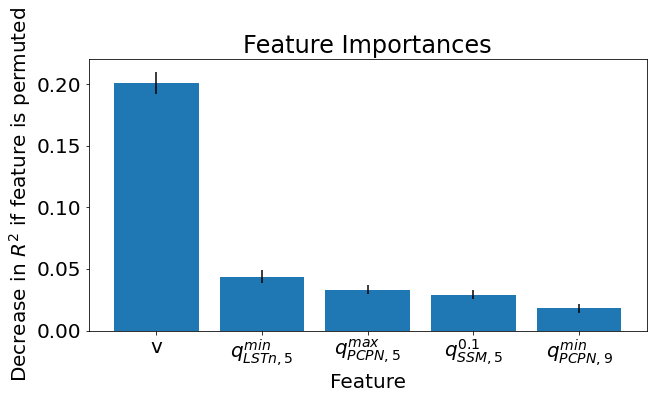

[('Previous District Yield(Kg/Ha)', 0.200826212821627, 0.009256101474242774),
 ('LST_night_05_min', 0.043699355405974, 0.005165313255966231),
 ('Precipitation_05_max', 0.032926121086113, 0.003601909144917337),
 ('SSM_05_percentile_10', 0.029161007761205, 0.003568192425006286),
 ('Precipitation_09_min', 0.017867491336127, 0.003945270165504383),
 ('LST_night_09_median', 0.015601600640629, 0.00260004715950421),
 ('Precipitation_10_min', 0.013985649436619, 0.0018582434974573148),
 ('SSM_10_min', 0.011451851774701, 0.001460034353759585),
 ('SSM_07_max', 0.011156308270145, 0.0015238439998702556),
 ('FAPAR_08_percentile_10', 0.011146063150216, 0.0013824861625532372),
 ('SUSM_08_median', 0.009001680260651, 0.0022910222203843303),
 ('EVI_08_mean', 0.008761955521751, 0.001125598888641034),
 ('SIF_10_max', 0.008744183737669, 0.00196837530374229),
 ('SUSM_10_max', 0.00613646629541, 0.0010849451048520664),
 ('LAI_06_max', 0.005905017841214, 0.0015090550099431802),
 ('SSM_09_max', 0.005250428268373,

In [110]:
permutation_importances(clf_geo, variables_geo, 'Average Yield(Kg/Ha)', geo_test, 'D:/other_thesis/rf_model/files/importances/perm_geo55.png', 5, ['v', '$q_{LSTn,5}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{SSM,5}^{0.1}$', '$q_{PCPN,9}^{min}$'])

In [9]:
def SHAP_explainer(rf_model, train_dataset, features_com, predictor, length):
    rf_model = shap.TreeExplainer(rf_model)
    shap_values_rf_train = rf_model.shap_values(train_dataset[features_com])
    
    plt.title('SHAP ' + predictor)
    #shap.summary_plot(shap_values_rf_train, train_dataset[features_com], max_display = length, show=False)
    shap.summary_plot(shap_values_rf_train, ['v', '$q_{LSTn,5}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{SSM,5}^{0.1}$', '$q_{PCPN,9}^{min}$'], max_display = length, show=False)
    #plt.xticks(['v', '$q_{LSTn,5}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{SSM,5}^{0.1}$', '$q_{PCPN,9}^{min}$'], rotation='vertical')
    #plt.ylabel(['v', '$q_{LSTn,5}^{min}$', '$q_{PCPN,5}^{max}$', '$q_{SSM,5}^{0.1}$', '$q_{PCPN,9}^{min}$'])
    plt.show()
    return()

IndexError: list index out of range

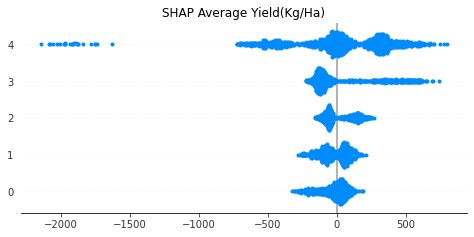

In [10]:
SHAP_explainer(clf_geo, geo_test, variables_geo, 'Average Yield(Kg/Ha)', 5)

In [36]:
rf_model = shap.TreeExplainer(clf_geo)
shap_values = rf_model.shap_values(geo_test[variables_geo])
# plt.title('SHAP ' + )
#shap.summary_plot(shap_values_rf_train, test_geo[variables], max_display = 3)

In [ ]:
# shp_plt = shap.dependence_plot('LST_night_05_min', shap_values_rf_train, test_geo[variables]) # CORRECT
shp_plt = shap.dependence_plot("Precipitation_05_max", shap_values, geo_test[variables_geo], interaction_index=None)

for i in range(len(variables_geo)):
   shp_plt = shap.dependence_plot("Precipitation_05_max", shap_values, geo_test[variables_geo], interaction_index='rank(' + str(i) + ')')
#SSM_05_percentile_10
#shap.dependence_plot(1, shap_values, train.values, feature_names=train.columns)

## RANDOM-SPLIT MODEL

In [53]:
updated_paramset_random = {'bootstrap': True, 'max_depth': 9, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 900}
opt_features_random = variables_random
n_estimators_ = updated_paramset_random['n_estimators']
max_depth_ = updated_paramset_random['max_depth']
bootstrap_ = updated_paramset_random['bootstrap']
min_samples_leaf_ = updated_paramset_random['min_samples_leaf']
min_samples_split_ = updated_paramset_random['min_samples_split']

X_train = random_train[opt_features_random]
X_test = random_test[opt_features_random]
Y_train = random_train['Average Yield(Kg/Ha)']
Y_test = random_test['Average Yield(Kg/Ha)']

max_features_optimal = math.ceil(len(opt_features_random)/3)
if max_features_optimal == 0:
    max_features_optimal = 1

# Set parameters equal to the optimal parameters found
clf_random = RandomForestRegressor(n_estimators = n_estimators_, max_depth = max_depth_, bootstrap = bootstrap_, max_features = max_features_optimal, min_samples_leaf = min_samples_leaf_, min_samples_split = min_samples_split_, random_state = 1234)

#Fit to the training data
clf_random.fit(X_train, Y_train)

RandomForestRegressor(max_depth=9, max_features=16, min_samples_leaf=3,
                      min_samples_split=7, n_estimators=900, random_state=1234)

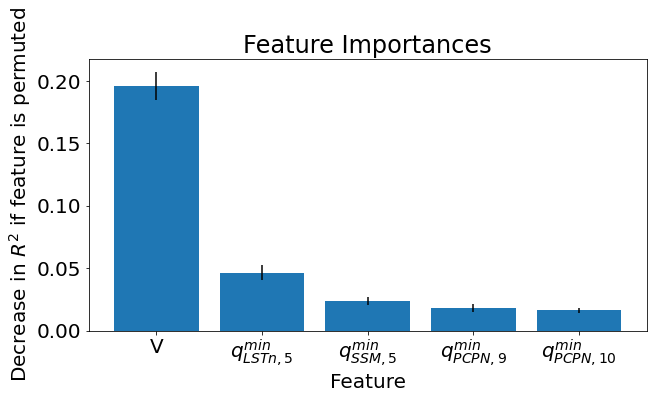

[('Previous District Yield(Kg/Ha)', 0.196300826284059, 0.01122853610036223),
 ('LST_night_05_min', 0.046247245210313, 0.005882562683749115),
 ('SSM_05_min', 0.023575174689995, 0.003140429394600042),
 ('Precipitation_09_min', 0.01801703669849, 0.0034595270292936847),
 ('Precipitation_10_min', 0.01625563948414, 0.0021819632099448322),
 ('FAPAR_08_percentile_10', 0.013958146892434, 0.0030679564221704997),
 ('SSM_10_min', 0.012568034827386, 0.0018718880504640296),
 ('LST_night_09_mean', 0.012444126110168, 0.0020095518778477602),
 ('SUSM_08_mean', 0.011854474373613, 0.0016799370465866502),
 ('SSM_07_percentile_90', 0.010245930760833, 0.001947520604380871),
 ('LAI_06_max', 0.008367281021744, 0.0017353996818177632),
 ('SIF_10_max', 0.008304587254204, 0.002264947411809656),
 ('LST_day_09_percentile_90', 0.007987540585276, 0.0012060783195774743),
 ('SUSM_05_percentile_90', 0.005925209352757, 0.0007720610783892034),
 ('EVI_08_mean', 0.005576802099911, 0.0009967632905201894),
 ('LST_night_10_mean

In [111]:
permutation_importances(clf_random, variables_random, 'Average Yield(Kg/Ha)', random_test, 'D:/other_thesis/rf_model/files/importances/perm_random55.png', 5, ['V', '$q_{LSTn,5}^{min}$', '$q_{SSM,5}^{min}$', '$q_{PCPN,9}^{min}$', '$q_{PCPN,10}^{min}$'])


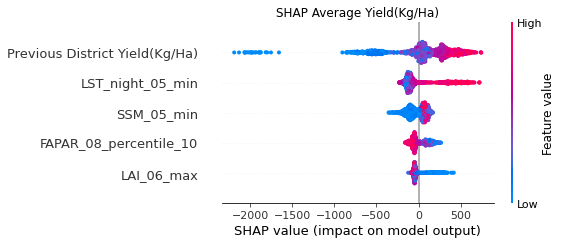

()

In [15]:
functions_model.SHAP_explainer(clf_random, random_test, variables_random, 'Average Yield(Kg/Ha)', 5)

In [ ]:
rf_model = shap.TreeExplainer(clf_random)
shap_values = rf_model.shap_values(random_test[variables_random])
# plt.title('SHAP ' + )
#shap.summary_plot(shap_values_rf_train, test_geo[variables], max_display = 3)

In [ ]:
# shp_plt = shap.dependence_plot('LST_night_05_min', shap_values_rf_train, test_geo[variables]) # CORRECT
shp_plt = shap.dependence_plot("soil_medium", shap_values, random_Test[variables_random], interaction_index=None)

# for i in range(len(variables)):
#    shp_plt = shap.dependence_plot("soil_medium", shap_values, train[variables], interaction_index='rank(' + str(i) + ')')

#shap.dependence_plot(1, shap_values, train.values, feature_names=train.columns)

## SOIL TYPE DUMMIES

In [ ]:
time_df = pd.concat([time_train, time_test], axis=0)